<a href="https://colab.research.google.com/github/carlossoto362/QLS2021-2022Diploma/blob/main/Copy_of_StatMechWithPython_TutorialProject_CarlosSoto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical Mechanics with Python: Tutorial project**
*December 2021*

*Proyect made by: Carlos Enmanuel Soto Lopez*

*carlos.soto362@gmail.com / csoto_lo@ictp.it*


## **The 2D Potts model**
This is the tutorial project in the Statistical Mechanics with python curse. The 2D Potts model is a two dimentional lattice with $N = L\times L$ spins, each of them can be in one of *q* diferent colors $s_i=(1,2,\dots,q)$.

The Hamiltonian of this system is,
\begin{equation}
H(x) = -\sum _{(i,j)}J\delta (s_i,s_j) - \sum _{i} h \delta (s_i,1),
\end{equation}
where $J$ is the coupling energy constant, $h$ a magnetic field. The sum over $(i,j)$ is the sum over nearest neighbors only, and $i = (i_x,i_y), j = (j_x, j_y) \in (0,L]\times (0,L]$ . The $\delta()$ is the kronecker delta. For this problem I have to use periodic boundary conditions.

### **Programing part** ###
This is a Metropolis Montecarlo simulator for the 2D Potts model of any number of colors q. 

- Write a function that takes as arguments a 2D array of $L \times L$ spins, $\vec{s} = {s_{1,1},...,s_{L,L}} (s \in 0,1,...,q )$, the coupling constant $J$, and the
magnetic field $h$ and returns the energy of that configuration $\vec{s}$.

In [ ]:
#Proyect made by: Carlos Enmanuel Soto Lopez
#carlos.soto362@gmail.com / csoto_lo@ictp.it
#https://github.com/carlossoto362/QLS2021-2022Diploma

#This proyect is a Metropolis Montecralo simulator for a 2D Potts model of any number of colors q. 

import numpy as np
import matplotlib.pyplot as plt



###########################################################
#For the function of energy, I like to define functions for the spin on the left, right, up and down first:
def up(x,y,L):
  """
  left(x,y) is a numpy array of lengt 2, with the coordinates of the spin at the left of the coordinates x,y.
  L is the length of one dimention of the matrix.
  """
  if x == 0:
    l = np.array([L-1,y])
  else:
    l = np.array([x-1,y])
  return l

def down(x,y,L):
  """
  right(x,y) is a numpy array of lengt 2, with the coordinates of the spin at the right of the coordinates x,y.
  L is the length of one dimention of the matrix.
  """
  if x == L-1:
    l = np.array([0,y])
  else:
    l = np.array([x+1,y])
  return l

def right(x,y,L):
  """
  up(x,y) is a numpy array of lengt 2, with the coordinates of the spin up to the coordinates x,y.
  L is the length of one dimention of the matrix.
  """
  if y == L-1:
    l = np.array([x,0])
  else:
    l = np.array([x,y+1])
  return l

def left(x,y,L):
  """
  down(x,y) is a numpy array of lengt 2, with the coordinates of the spin down of the coordinates x,y.
  L is the length of one dimention of the matrix.
  """
  if y == 0:
    l = np.array([x,L-1])
  else:
    l = np.array([x,y-1])
  return l

############################################################
#Lets defin the delta functions as well
def delta1(s):
  if s == 1:
    r = 1
  else:
    r = 0
  return r

def delta2(s1,s2):
  if s1 == s2:
    r = 1
  else:
    r = 0
  return r

############################################################
#Now lets define the function that returns the energy. By the way, I will not use this function XD. 
#I will use the function that calculates the diference in energy, which will only depend on the neighbors.

def Energy(Matrix2D,J,h):
  """
    Energy(Matrix2D,J,h) is a float number, Matrix2D a LxL array with integer values between 0 and q, J and h are float numbers.
  """
  L = Matrix2D.shape[0]
  #the sum over the individual elements is easy, the problem is that the sum over the neighbors will count two times each interaction, 
  #so, dividing by to will lead to the correct result, and is hard in the sence that I can't do it with simple matrix operations. 
  H = 0
  for i in range(0,L):
    for j in range(0,L):
      H += - h * delta1(Matrix2D[i,j]) - (J/2) * ( delta2(Matrix2D[i,j],Matrix2D[left(i,j,L)[0],left(i,j,L)[1]]) + \
                                                  delta2(Matrix2D[i,j],Matrix2D[right(i,j,L)[0],right(i,j,L)[1]]) + \
                                                  delta2(Matrix2D[i,j],Matrix2D[up(i,j,L)[0],up(i,j,L)[1]]) + \
                                                  delta2(Matrix2D[i,j],Matrix2D[down(i,j,L)[0],down(i,j,L)[1]]))
  return H

    

Write a function that compute the value of the magnetization $m_1$ of the sequence $m_1(\vec{s})$ defined as the percentage of the sites wich are in the $q=1$ color state (normalized between 0 and 1).

In [ ]:
def m1(Matrix2D):
  """
  m1(Matrix2D) counts the number of elemets on the matrix if they are equal to 1, and normalized the result with respect to the total number of elements on the matrix.
  """
  L = Matrix2D.shape[0]
  M = (Matrix2D==1).sum()/(L**2)
  return M
  
 

Check that for a lattice of homogeneous color (all sites with $s = 1$, or
$s = 2$ etc.) and $h = 0.1$ the first function that you wrote returns the
energy $−J ∗N ∗2 −N ∗h$ for the case of s = 1 and $−J ∗N ∗2$ for all other
cases

In [ ]:

###########################################################
#Defining two simple matrix of dimention 5x5, one with ones and the other with twos. 
N = 5*5
h = 0.1
J = 1.

MatrixOnes = np.ones((5,5))
print(MatrixOnes,"\n")
print("Energy expected;_", -J*N*2-N*h , "Energy obteind:_",Energy(MatrixOnes,J,h),"\n")
MatrixTwos = MatrixOnes*2
print(MatrixTwos,"\n")
print("Energy Expected:_", -J*N*2 , "Energy obteined:_",Energy(MatrixTwos,1.,0.1))



[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] 

Energy expected;_ -52.5 Energy obteind:_ -52.50000000000002 

[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]] 

Energy Expected:_ -50.0 Energy obteined:_ -50.0


Check that for a lattice of homogeneous color (all sites with $s = 1$, or
$s = 2$ etc.) the second function shows a magnetization $m1 = 1$ for
the $s = 1$ color and $m1 = 0$ for all other colors.

In [ ]:
print("Magnetization expected:_", 1, "obteined:_",m1(MatrixOnes),"\n")
print("Magnetization expected:_", 0, "obteined:_",m1(MatrixTwos),"\n")

Magnetization expected:_ 1 obteined:_ 1.0 

Magnetization expected:_ 0 obteined:_ 0.0 



Check that for a sequence of randomly generated lattices with number of
colors q, the energy is distributed around $−J ∗N ∗2/q −N ∗h/q$ and the
magnetization is approximately $1/q$ (check for a few values of q).

In [ ]:
###########################################################
#this part include code that was not teached in the class, but i think is a nice inclusion. Of course, it can be ignored...
#It ask to the user for the number of colors.
"""
q = input("write the number of colors please_ ")
flag = False
while flag == False:
  try:
    q = int(q)
    flag = True
  except ValueError:
    q = input("Incorrect input, try with a number, not an integer_ ")
"""
#############################################################
#if the prebious part is on, this part should be off
q=3
#############################################################
#Creating the list of m  matrices of dimention N
np.random.seed(2021)
m = 100
L = 100
N = L*L
Series = (np.random.random((m,L,L))*q).astype(int) + 1


In [ ]:
##############################################################
#Calculating the average energy and magnetization, with magnetic field h and interaction constant J
h=0.1
J=1
Energys = np.empty(m)
Magnetizations = np.empty(m)

for i in range(m):
  Energys[i] = Energy(Series[i],J,h)
  Magnetizations[i] = m1(Series[i])

In [ ]:
AverageEnergy = Energys.mean()
DeviationEnergy = Energys.std()
AverageMagnetization = Magnetizations.mean()
DeviationMagnetization = Magnetizations.std()
print("Expected Energy: ",-(J*N*2 / q) - (N*h)/q, "Energy average obteined: ",round(AverageEnergy,2),"+-",round(DeviationEnergy,2))
print("Expected Magnetization: ",round(1/q,2), "Magnetization average obteined: ",round(AverageMagnetization,2),"+-",round(DeviationMagnetization,2))

Expected Energy:  -7000.0 Energy average obteined:  -7004.91 +- 63.25
Expected Magnetization:  0.33 Magnetization average obteined:  0.33 +- 0.01


## **Metropolis Markov chain**

I have to use the metropolis algoritm to sample from the canonical ensamble of $\vec{s}$. The algoritm I will use is sumiriced in the next steps:

- Generate a rando sample $\vec{s}$.
- Generate a new random sample $\vec{s}'$, equal to the sample $\vec{s}$, but with one spin changed. 
- If the diference in the energy $\Delta E \leq 0$, accept the new sample, if not, accept the new sample with probability $p = e^{-\beta \Delta E}$.
- Repit the procedure at least a number of times $n > q^N$, where $q^N$ is the total number of posible configurations.  This is to ensure that the algoritm conciders a sustancial amount of all the posible configurations.  


In [ ]:
#Defining the diference in energy:
#When one of the spins is  change, the diference in the energy only concerns the spin that was changed and his neightbours. 
def DeltaEnergy(Matrix2D,position,newQ,J,h):
  """
  DeltaEnergy is a float equal to the diference betwin the function Energy(Matrix2D,J,h) of the lattice Matrix2D and the lattice Matrix2D with the element 
  "position" change to "newQ". Position is a numpy array of two elements, equal to the coordinates of in the Matrix2D that was changed. 
  """
  L = np.shape(Matrix2D)[0]
  i=position[0]
  j=position[1]
  H1 = - h * delta1(Matrix2D[i,j]) - (J/2) * ( delta2(Matrix2D[i,j],Matrix2D[left(i,j,L)[0],left(i,j,L)[1]]) + \
                                                  delta2(Matrix2D[i,j],Matrix2D[right(i,j,L)[0],right(i,j,L)[1]]) + \
                                                  delta2(Matrix2D[i,j],Matrix2D[up(i,j,L)[0],up(i,j,L)[1]]) + \
                                                  delta2(Matrix2D[i,j],Matrix2D[down(i,j,L)[0],down(i,j,L)[1]]))
  
  H2 = - h * delta1(newQ) - (J/2) * ( delta2(newQ,Matrix2D[left(i,j,L)[0],left(i,j,L)[1]]) + \
                                                  delta2(newQ,Matrix2D[right(i,j,L)[0],right(i,j,L)[1]]) + \
                                                  delta2(newQ,Matrix2D[up(i,j,L)[0],up(i,j,L)[1]]) + \
                                                  delta2(newQ,Matrix2D[down(i,j,L)[0],down(i,j,L)[1]]))
  return H2 - H1

Checking that, given $\vec{s}= ((1,2,2),(2,1,1),(2,1,1)),\vec{s}'= ((2,2,2),(2,1,1),(2,1,1)), J = 1,
h = 0.1$ I must obtain $\Delta E = −1.9$.

In [ ]:
s1 = np.array([[1,2,2],[2,1,1],[2,1,1]])
s2 = np.array([[2,2,2],[2,1,1],[2,1,1]])
J = 1
h = 0.1
position = np.array([0,0])
newQ = 2.
print("Delta energy:_ ",DeltaEnergy(s1,position,newQ,J,h))

Delta energy:_  -1.9


Writing a function that takes as arguments a configuration, $\vec{s}$, the number
of possible colors $q$, the coupling constant $J$, the magnetic field $h$ and the
inverse temperature $β$, and returns a new configuration according to the
Metropolis prescription.

In [ ]:
def metropolisStep(Matrix2D,q,J,h,betha):
  """
  metropolisStep takes a matrix, choose at random one coordenate, reeds the value of the coordenate and chooses an integer diferent from his value, 
  less than q. If the diference in energy is less than 0, returns the Matrix2D but whith the value changed, if not, returns the matrix changed with
  probability exp{-betha * DeltaEnergy}.
  """
  L = np.shape(Matrix2D)[0]
  position = (np.random.random((2))*L).astype(int) 
  value = Matrix2D[position[0],position[1]]
  flag = False
  while flag == False:
    newQ = int(np.random.random()*q) + 1
    if newQ != value:
      flag = True
    else:
      pass
  dE = DeltaEnergy(Matrix2D,position,newQ,J,h)
  if dE <= 0:
    Matrix2D[position[0],position[1]] = newQ
    return Matrix2D, dE
  else:
    if (np.random.random() < np.exp(-betha *dE)):
      Matrix2D[position[0],position[1]] = newQ
      return Matrix2D, dE
    else:
      return Matrix2D, 0


Iterating the function above for some steps starting from a random initial
configuration of N = 20 ×20 spins. Checking that, when q = 2, h = 0.1 and
choosing a small temperature β = 10, I end up in a configuration where
all the sites have color 1 after enough iterations

In [ ]:
np.random.seed(2021)
L = 20
N = L*L
q = 2
h = 0.1
J = 1
betha = 10
Matrix2D = (np.random.random((L,L))*q).astype(int) + 1
for k in range(10000):
  Matrix2D = metropolisStep(Matrix2D,q,J,h,betha)[0]
print(Matrix2D)


[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


## **Generating samples and computing the magnetization**

Write a function that generates samples of energy and magnetization with
the Metropolis algorithm. The function takes as argument the length of
the chain L, the inverse temperature β, the number of colors q, the coupling constant J, the magnetic field h, the equilibration time $t_e$ and the
number of samples $N_{samples}$. It returns the list/array of the $N_{samples}$ generated samples.

In [ ]:
#Lets get the equilibration time: The time needed in orther to get to the stable distribution.
#Generating the random matrix:
#caclulating the initial magnetization, and storing the magnetization after m iterations, for 5 values of L

q = 2
h = 0.1
J = 1
betha = 10
m=20000
np.random.seed(2021)
MagnetizationList = np.empty((m,8))
r=0
for L in [5,10,15,20,25,30,35,40]:
  N = L*L
  Matrix2D = (np.random.random((L,L))*q).astype(int) + 1

  for k in range (m):
   MagnetizationList[k,r] = m1(Matrix2D)
   Matrix2D = metropolisStep(Matrix2D,q,J,h,betha)[0]
  r = r+1
steps = np.arange(m)

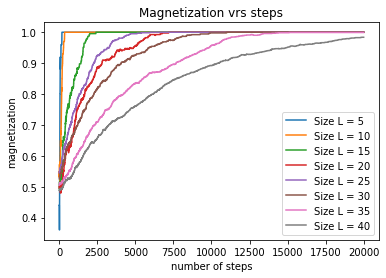

In [ ]:
plt.title("Magnetization vrs steps")
plt.xlabel("number of steps")
plt.ylabel("magnetization")

for k in range(8):
  plt.plot(steps,MagnetizationList[:,k], label= "Size L = " + str(k*5 + 5))
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


equilibrium time:_  2645


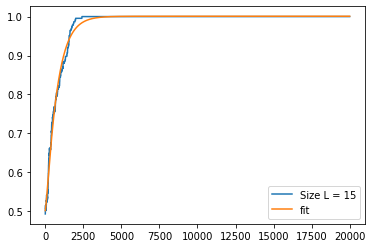

In [ ]:
#The time depends on the size of the lattice. The shape of this curves is similar to the function 1-e**{-x/tp}, where tp would be a 
#mesure of the equilibrium time. Lets fit this data to this function, using the librery scipy, with the function scipy.optimize.curve_fit :
from scipy.optimize import curve_fit as scurve
def func(x, tp,a,b,c):
  return c*(1-np.exp(-x/tp))**a - b
#popt are the optimal parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.
#pcov is the covariance
k=2
popt, pcov = scurve(func, steps, MagnetizationList[:,k]) 
#am using L = k, using 3*tp as the equilibrium time:
print("equilibrium time:_ ", int(4*popt[0]))

plt.plot(steps,MagnetizationList[:,k], label= "Size L = " + str(5*k + 5))
plt.plot(steps, func(steps, *popt), label='fit')
plt.legend()
plt.show()


In [ ]:
#defining a function that does this procedure for any lattice:
def equilibriumTime(L,q,J,h,betha,n,m):
  """
  equilibriumTime(q,J,h,betha,n,m) returns an aproximation of the mean of the equilibrium time, n is the number of samples used to calculate the mean tp.
  m is the maximun number of steps used to calculate one tp.
  """
  
  tps = np.zeros(n)
  for i in range(n):
    flag = False
    while flag == False:
      try:
        Matrix2D = (np.random.random((L,L))*q).astype(int) + 1
        MagnetizationList = np.zeros(m)
        for k in range (m):
          MagnetizationList[k] = m1(Matrix2D)
          Matrix2D = metropolisStep(Matrix2D,q,J,h,betha)[0]

        steps = np.arange(m)
        tps[i] = int(scurve(func, steps, MagnetizationList)[0][0])
        flag = True 
      except RuntimeError:
        pass
  #deleten large deviations
  tps = tps.astype(int)
  for _ in range(int(0.1*n)):
    tps = np.delete(tps,np.argmax(tps))
  return np.mean(tps),tps



In [ ]:
#Cheking the function
np.random.seed(2023)
tp,tps=equilibriumTime(10,q,J,h,betha,400,2000)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """


In [ ]:
print(4*tp)


695.8777777777777


In [ ]:
#the previous procedure only works with low temperatures!!!
#Now lets analice the correlation time:
#The idea is to make n realizations of the same experiment, and see how the correlation time evolves, for m events after the time tp. 
#Guiven an equilibrium time tp:
def selfCorrelation(L,q,J,h,betha,tp,n,m):
  """
  selfCorrelation(Matrix2D,J,h,q,tp,n,m) returns an array with the m values of the autocorrelation after the equilibrium time tp has pass. 
  """
  MomentInit = np.zeros((n))
  MomentTwo = np.zeros((n,m))
  products = np.zeros((n,m))
  for i in range(n):
    Matrix = (np.random.random((L,L))*q).astype(int) + 1
    for _ in range(tp):
      Matrix = metropolisStep(Matrix2D,q,J,h,betha)[0]
    magnetizationInit = m1(Matrix)
    MomentInit[i] = magnetizationInit
    for j in range(m):
      Matrix = metropolisStep(Matrix,q,J,h,betha)[0]
      mag = m1(Matrix)
      MomentTwo[i,j]=mag
      products[i,j]=MomentInit[i]*mag
  stdM1 = np.std(MomentInit) 
  meanM1 = np.mean(MomentInit)
  stdM2 = np.std(MomentTwo,axis=0)
  meanM2 = np.mean(MomentTwo,axis =0)
  meanM1M2 = np.mean(products,axis=0)
  return (meanM1M2 - meanM1 * meanM2)/(stdM1 * stdM2)


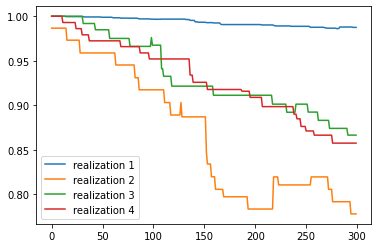

In [ ]:
#lets tried it
#np.random.seed(2023)
q = 2
h = 0.1
J = 1
betha = 4
L=10
N =L*L
tp = 700
m = 300
n=100
for i in range(4):
  scorrelation = selfCorrelation(L,q,J,h,betha,tp,n,m)
  steps = np.arange(m)
  plt.plot(steps,scorrelation,label="realization " + str(i + 1))
plt.legend()
plt.show()

In [ ]:
#this problem has the inconvinient of been too long and computationaly complicated. Using the fact that 4*L*L seems to work fine, 
#that is the value that I will use. Defining the sampling:

def sampling(L,q,J,h,betha,tp,N,tc):
  """
  sampling(L,q,J,h,betha,tp,N) creates an array of lengt N with the energies and magnetization of a lattice in the potts model, of leng L,
  with interaction constant J, magnetic field h, q colors, energy betha and equilibrium time tp. I'm going to asume that the correlation
  time is equal to 2*L*L. returns a numpy array of dimention (N,2), with N tuplets of energy and momentum. 
  """
  sample = np.zeros((N,2))
  Matrix = (np.random.random((L,L))*q).astype(int) + 1
  for _ in range(tp):
    Matrix = metropolisStep(Matrix,q,J,h,betha)[0]
  for i in range(N):
    sample[i,0]=Energy(Matrix,J,h)
    sample[i,1]=m1(Matrix)
    for _ in range(tc):
      Matrix = metropolisStep(Matrix,q,J,h,betha)[0]
  return sample
  

In [ ]:
#testing the function:
print(sampling(10,2,1,0.1,2,2000,20,400))

[[-201.8     0.98]
 [-210.      1.  ]
 [-205.9     0.99]
 [-183.2     0.92]
 [-197.7     0.97]
 [-199.7     0.97]
 [-205.9     0.99]
 [-210.      1.  ]
 [-203.8     0.98]
 [-205.9     0.99]
 [-210.      1.  ]
 [-210.      1.  ]
 [-205.9     0.99]
 [-205.9     0.99]
 [-201.8     0.98]
 [-201.8     0.98]
 [-201.8     0.98]
 [-193.5     0.95]
 [-180.8     0.88]
 [-191.4     0.94]]


## **Numerical investigations**

The Potts model presents different phase transitions for different number of
colors $q$. For $q ≤4$ the model presents the same transition as the Ising model, i.e. a continuous transition between an homogeneous (ferromagnetic) state at low temperature (large $\beta$) and a random-mix state at large temperature. The exact temperature of the transition at infinite size for $h = 0$ is $\beta_c(q) = ln(1+p(q))/J$.
For $q > 4$ the transition becomes first order, so there is a discontinuity (in the N →∞limit only) in the energy as the temperature cross the critical value $\beta_c(q)$.

- Taking $J = 1$ and a small value of h = 0.05 (only to break the symmetry in
color). Study the average energy and magnetization for different
temperatures crossing the critical values at number of color $q = 2$
and $q = 5$ and ploting them. In both case, to focus the data points for
inverse temperatures β close to the transition in order to distinguish their
behavior. 

- For both values of $q$ measure the correlation time for the energy and magnetization at a inverse temperature $β > β_c$. Use these value to estimate the
error on average magnetization and energy from the variance. (Remember: $\delta_2 = \sigma_2/N_{corr}$, where $N_{corr}$ is the number of samples corresponding to the correlation time.) Add the errors to the plot above.

In [ ]:
#Let's first studied the dependence of the equilibrium time on the temperature, of a lattice with L = 5 and q = 2.
#np.random.seed(2021)
L=10
q=2
J=1
h=0.1
bethas = [2,4,6,8,10]
m=2000
magnetizationList = np.zeros((m,5))
r=0
for betha in bethas:
  Matrix2D = (np.random.random((L,L))*q).astype(int) + 1

  for k in range (m):
   magnetizationList[k,r] = m1(Matrix2D)
   Matrix2D = metropolisStep(Matrix2D,q,J,h,betha)[0]
  r = r+1
steps = np.arange(m)


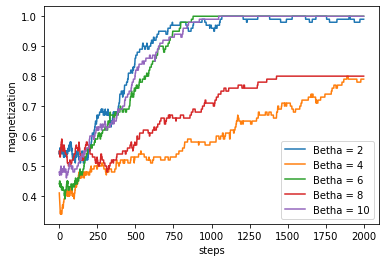

In [ ]:
plt.xlabel("steps")
plt.ylabel("magnetization")
for i in range(5):
  plt.plot(steps,magnetizationList[:,i],label = "Betha = " + str(bethas[i]))
plt.legend()
plt.show()

In [ ]:
#It seems that the bihaviour is the same, but with a lot of noise for hight temperatures, wich makes it take longer to get to the stable magnetization. 
#let's find tp for 4 ranges of the temperature, h = 0.05 and q = 2
bethas = [1,2,3,4]
tp = np.zeros(4)
L=10
q=2
J=1
h=0.05

for betha in bethas:
  tp[betha-1]=equilibriumTime(L,q,J,h,betha,400,2000)[0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [ ]:
print("tp for betha = 1:_ ",int(tp[0]*4),", tp for betha = 2:_ ",int(tp[1]*4),", tp for betha = 3:_ ",int(tp[2]*4),", tp for betha = 4:_ ",int(tp[3]*4))
tps2=np.array([int(tp[0]*4),int(tp[1]*4),int(tp[2]*4),int(tp[3]*4)])

tp for betha = 1:_  115 , tp for betha = 2:_  976 , tp for betha = 3:_  834 , tp for betha = 4:_  876


In [ ]:
#let's find tp for 4 ranges of temperature, h = 0.05 and q = 5
bethas = [1,2,3,4]
tp = np.zeros(4)
L=10
q=5
J=1
h=0.05

for betha in bethas:
  tp[betha-1]=equilibriumTime(L,q,J,h,betha,300,3000)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [ ]:
print("tp for betha = 1:_ ",int(tp[0]*4),", tp for betha = 2:_ ",int(tp[1]*4),", tp for betha = 3:_ ",int(tp[2]*4),", tp for betha = 4:_ ",int(tp[3]*4))
tps5=np.array([int(tp[0]*4),int(tp[1]*4),int(tp[2]*4),int(tp[3]*4)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


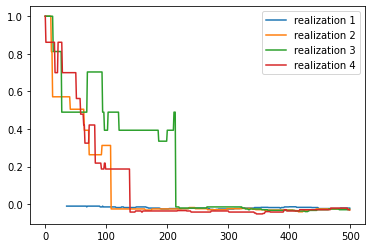

In [ ]:
#And what about the correlation time for this h=0.05 and q = 2?
q = 2
h = 0.05
J = 1
betha = 4
L=10
N =L*L
tp = 900
m = 500
n=100
for i in range(4):
  scorrelation = selfCorrelation(L,q,J,h,betha,tp,n,m)
  steps = np.arange(m)
  plt.plot(steps,scorrelation,label="realization " + str(i + 1))
plt.legend()
plt.show()

In [ ]:
#seems that the correlation time is biguer with this value of h, but is almost the same. lets us 500 as the correlation time

In [ ]:
#Now, lets make the graphs. 
points = 100
bethas = np.arange(points) * (4./points)
q=2
tc=500
N=100
h=0.05
L=10
meanM2 = np.zeros(points)
meanE2 = np.zeros(points)
errM2 = np.zeros(points)
errE2 = np.zeros(points)
k=0
for betha in bethas:
  print(betha, end = " ")
  if betha <= 1:
    tp = tps2[0]
  elif betha <= 2:
    tp = tps2[1]
  elif betha <= 3:
    tp = tps2[2]
  else:
    tp = tps2[3]
  sam = sampling(L,q,J,h,betha,tp,N,tc)
  meanE2[k],meanM2[k] = np.mean(sam,axis=0)
  errE2[k],errM2[k] = np.std(sam,axis=0)
   
  k += 1


0.0 0.04 0.08 0.12 0.16 0.2 0.24 0.28 0.32 0.36 0.4 0.44 0.48 0.52 0.56 0.6 0.64 0.68 0.72 0.76 0.8 0.84 0.88 0.92 0.96 1.0 1.04 1.08 1.12 1.16 1.2 1.24 1.28 1.32 1.36 1.4000000000000001 1.44 1.48 1.52 1.56 1.6 1.6400000000000001 1.68 1.72 1.76 1.8 1.84 1.8800000000000001 1.92 1.96 2.0 2.04 2.08 2.12 2.16 2.2 2.24 2.2800000000000002 2.32 2.36 2.4 2.44 2.48 2.52 2.56 2.6 2.64 2.68 2.72 2.7600000000000002 2.8000000000000003 2.84 2.88 2.92 2.96 3.0 3.04 3.08 3.12 3.16 3.2 3.24 3.2800000000000002 3.3200000000000003 3.36 3.4 3.44 3.48 3.52 3.56 3.6 3.64 3.68 3.72 3.7600000000000002 3.8000000000000003 3.84 3.88 3.92 3.96 

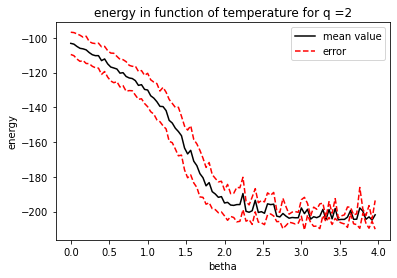

In [ ]:

plt.xlabel("betha")
plt.ylabel("energy")
plt.title("energy in function of temperature for q =2")
plt.plot(bethas,meanE2, color = "black", label ='mean value')
plt.plot(bethas,errE2 + meanE2, color = "red", linestyle='dashed', label ='error')
plt.plot(bethas, meanE2 - errE2, color = "red", linestyle='dashed')
plt.legend()
plt.show()

No handles with labels found to put in legend.


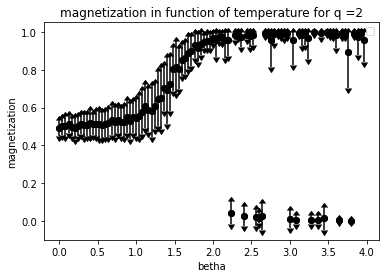

In [149]:
#fixing the error bars for magnetization
errMup2 = np.array(errM2)
errMdown2 = np.array(errM2)
for i in range(points):
  if errM2[i] + meanM2[i] > 1:
    errMup2[i] = 1-meanM2[i]
  if meanM2[i] - errM2[i] < 0:
    errMdown[i] = 0



plt.xlabel("betha")
plt.ylabel("magnetization")
plt.title("magnetization in function of temperature for q =2")
plt.errorbar(bethas,meanM2,yerr=errMdown2,uplims=True, color = "black", fmt='o')
plt.errorbar(bethas,meanM2,yerr=errMup2,lolims=True, color = "black", fmt='o')
#plt.errorbar(bethas, meanM2 - errM2, color = "red", linestyle='dashed')
plt.legend()
plt.show()


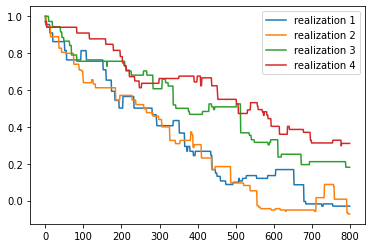

In [ ]:
#And what about the correlation time for this h=0.05 and q = 5?
q = 5
h = 0.05
J = 1
betha = 4
L=10
N =L*L
tp = 900
m = 800
n=100
for i in range(4):
  scorrelation = selfCorrelation(L,q,J,h,betha,tp,n,m)
  steps = np.arange(m)
  plt.plot(steps,scorrelation,label="realization " + str(i + 1))
plt.legend()
plt.show()

In [ ]:
#am going to use 700. Lets make the graphs: 
points = 100
bethas = np.arange(points) * (4./points)
q=5
tc=700
N=100
h=0.05
L=10
meanM5 = np.zeros(points)
meanE5 = np.zeros(points)
errM5 = np.zeros(points)
errE5 = np.zeros(points)
k=0
for betha in bethas:
  print(betha, end = " ")
  if betha <= 1:
    tp = tps5[0]
  elif betha <= 2:
    tp = tps5[1]
  elif betha <= 3:
    tp = tps5[2]
  else:
    tp = tps5[3]
  sam = sampling(L,q,J,h,betha,tp,N,tc)
  meanE5[k],meanM5[k] = np.mean(sam,axis=0)
  errE5[k],errM5[k] = np.std(sam,axis=0)
   
  k += 1

0.0 0.04 0.08 0.12 0.16 0.2 0.24 0.28 0.32 0.36 0.4 0.44 0.48 0.52 0.56 0.6 0.64 0.68 0.72 0.76 0.8 0.84 0.88 0.92 0.96 1.0 1.04 1.08 1.12 1.16 1.2 1.24 1.28 1.32 1.36 1.4000000000000001 1.44 1.48 1.52 1.56 1.6 1.6400000000000001 1.68 1.72 1.76 1.8 1.84 1.8800000000000001 1.92 1.96 2.0 2.04 2.08 2.12 2.16 2.2 2.24 2.2800000000000002 2.32 2.36 2.4 2.44 2.48 2.52 2.56 2.6 2.64 2.68 2.72 2.7600000000000002 2.8000000000000003 2.84 2.88 2.92 2.96 3.0 3.04 3.08 3.12 3.16 3.2 3.24 3.2800000000000002 3.3200000000000003 3.36 3.4 3.44 3.48 3.52 3.56 3.6 3.64 3.68 3.72 3.7600000000000002 3.8000000000000003 3.84 3.88 3.92 3.96 

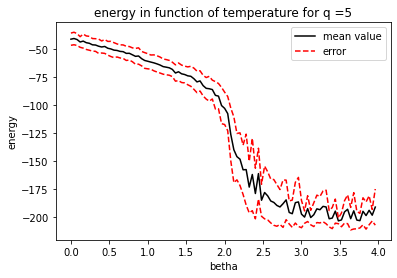

In [151]:
plt.xlabel("betha")
plt.ylabel("energy")
plt.title("energy in function of temperature for q =5")
plt.plot(bethas,meanE5, color = "black", label ='mean value')
plt.plot(bethas,errE5 + meanE5, color = "red", linestyle='dashed', label ='error')
plt.plot(bethas, meanE5 - errE5, color = "red", linestyle='dashed')
plt.legend()
plt.show()

No handles with labels found to put in legend.


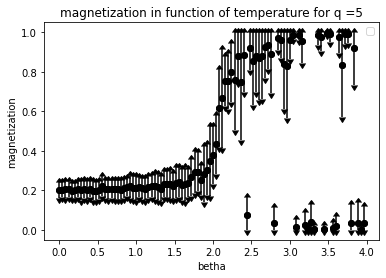

In [152]:

#fixing the error bars for magnetization
errMup5 = np.array(errM5)
errMdown5 = np.array(errM5)
for i in range(points):
  if errM5[i] + meanM5[i] > 1:
    errMup5[i] = 1-meanM5[i]
  if meanM5[i] - errM5[i] < 0:
    errMdown5[i] = meanM5[i]



plt.xlabel("betha")
plt.ylabel("magnetization")
plt.title("magnetization in function of temperature for q =5")
plt.errorbar(bethas,meanM5,yerr=errMdown5,uplims=True, color = "black", fmt='o')
plt.errorbar(bethas,meanM5,yerr=errMup5,lolims=True, color = "black", fmt='o')
#plt.plot(bethas, meanM - errM, color = "red", linestyle='dashed')
plt.legend()
plt.show()
